<a href="https://colab.research.google.com/github/seansothey/CSC685/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
#Required python version >= 3.5
import sys
assert sys.version_info >= (3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#to plot pretty figures
%matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

#where to save figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "project1"
PORJECT_DIR = os.path.join(PROJECT_ROOT_DIR,"AML",PROJECT_ID)
os.makedirs(PORJECT_DIR,exist_ok=True)

def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
  path = os.path.join(PORJECT_DIR,fig_id + "." + fig_extension)
  print("saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path,format = fig_extension,dpi = resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action = "ignore",message = "^internal glad")


Using matplotlib backend: agg


#Get the data

In [0]:
import os
import tarfile
import urllib
import pandas as pd


DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/"
DATA = "wine.data"
WINE_PATH = os.path.join(PORJECT_DIR,"dataset")
DATA_URL = os.path.join(DOWNLOAD_ROOT,DATA)

def fetch_wine_data(data_url = DATA_URL,wine_path = WINE_PATH):
  if not os.path.isdir(wine_path):
    os.mkdir(wine_path)
  data = pd.read_csv(data_url,header=None,index_col=False,
                     names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash',
                            'Magnesium','Total phenols','Flavanoids',
                            'Nonflavanoid phenols','Proanthocyanins',
                            'Color intensity','Hue','OD280/OD315 of diluted wines',
                            'Proline'])
  
  data.to_csv(os.path.join(wine_path,"wineData.csv"))
  return data

In [3]:
fetch_wine_data()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [0]:
def load_wine_data(wine_path = WINE_PATH):
  return fetch_wine_data(DATA_URL,wine_path)

In [7]:
wine = load_wine_data()
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [10]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#Plot the data

saving figure attribute_histogram_plots


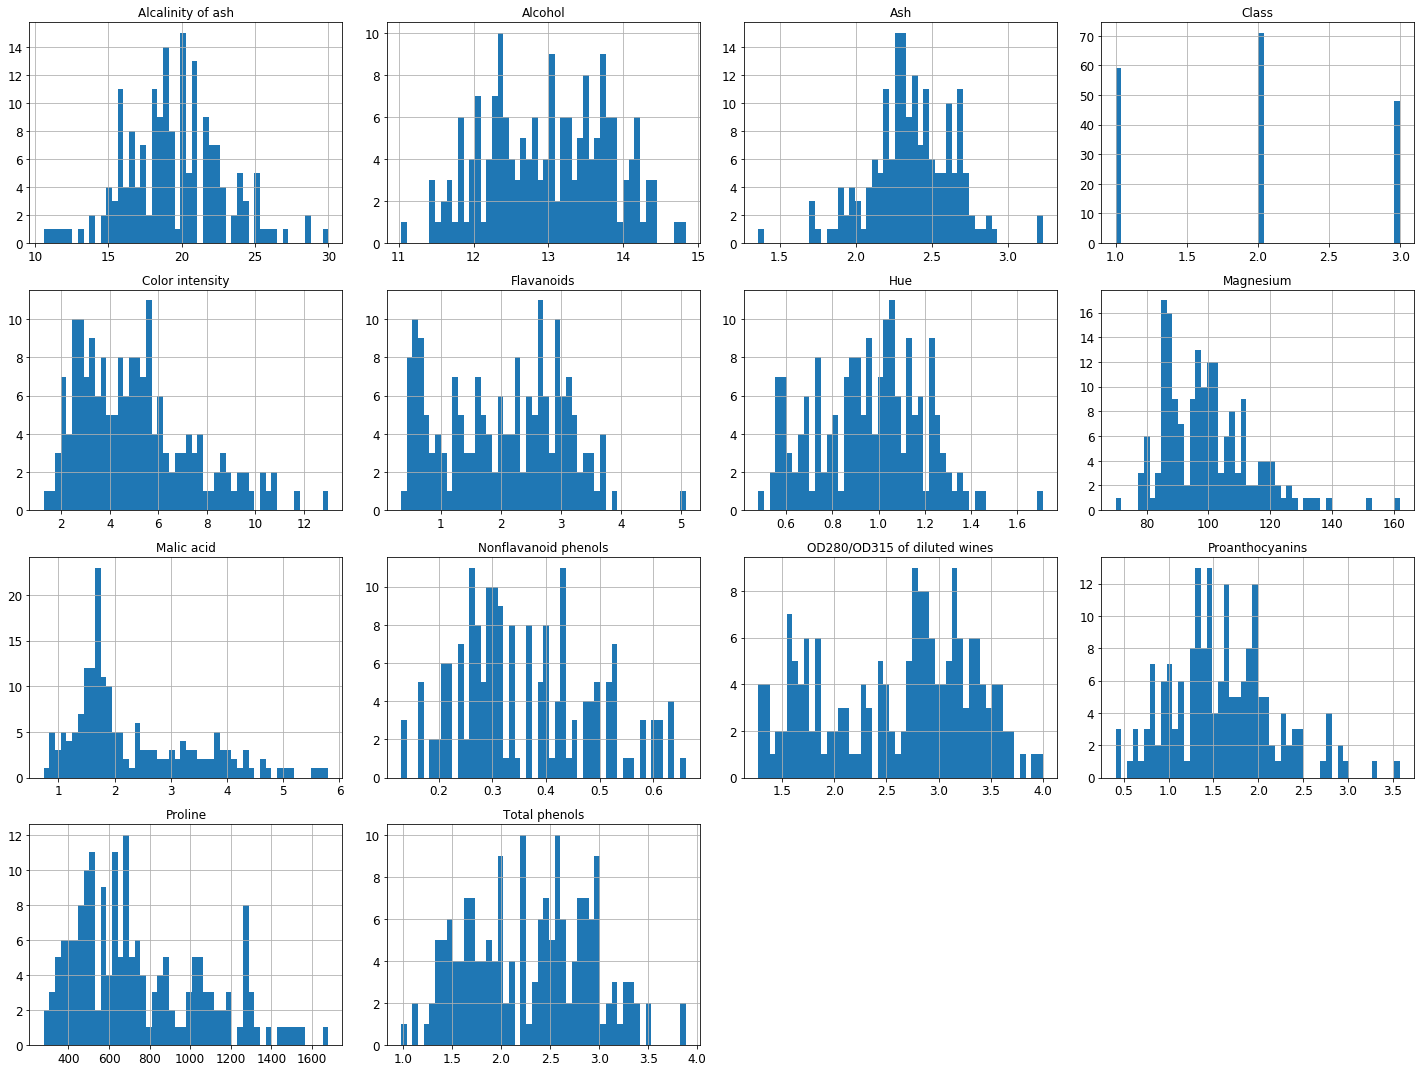

In [11]:
%matplotlib inline
import matplotlib.pyplot as plot
wine.hist(bins=50,figsize=(20,15))
save_fig('attribute_histogram_plots')
plot.show()

In [0]:
#to make this notebook's output identeical at every run
np.random.seed(70)

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data,test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = split_train_test(wine,0.2)
len(train_set)

143

In [22]:
len(test_set)

35

In [0]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id: test_set_check(id_,test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio,has=hashlib.md5):
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [25]:
test_set.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
37,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
18,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
89,2,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625


In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine, test_size = 0.2, random_state = 70)
test_set.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
37,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
18,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
89,2,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625


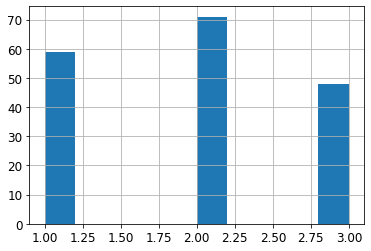

In [29]:
wine['Class'].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=70)
for train_index, test_index in split.split(wine, wine['Class']):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

In [32]:
strat_test_set['Class'].value_counts() / len(strat_test_set)

2    0.388889
1    0.333333
3    0.277778
Name: Class, dtype: float64

In [33]:
wine['Class'].value_counts() / len(wine)

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

#Plot the classification data against each of the attributes

In [0]:
wineData = strat_train_set.copy()

saving figure project1_wine_plot


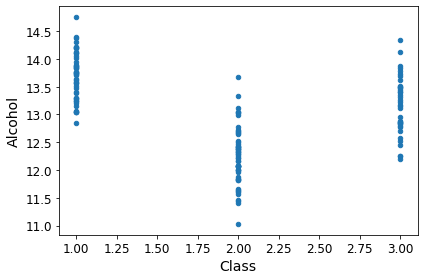

In [35]:
wineData.plot(kind="scatter",x="Class",y="Alcohol")
save_fig("project1_wine_plot")

saving figure project1_wine_plot


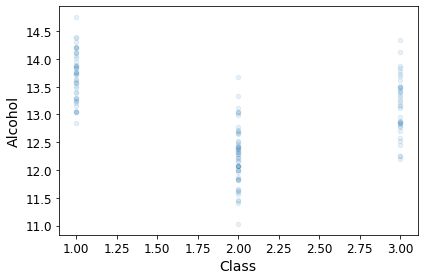

In [36]:
wineData.plot(kind="scatter",x="Class",y="Alcohol", alpha = 0.1)
save_fig("project1_wine_plot")

saving figure project1_wine_plot_colored


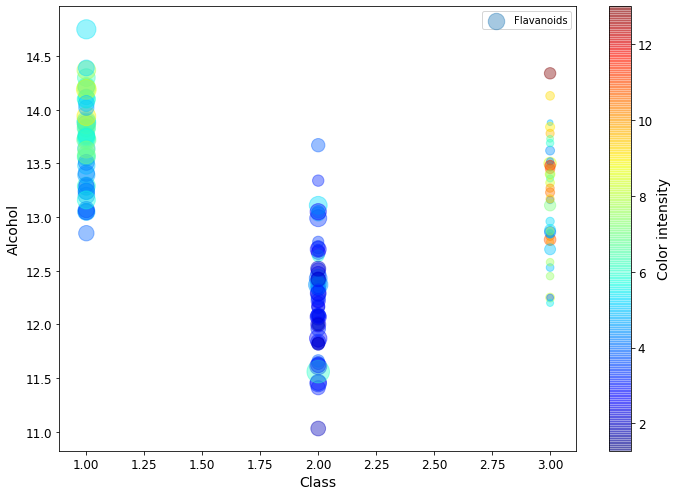

In [37]:
wineData.plot(kind="scatter",x="Class",y="Alcohol", alpha = 0.4,
              s = wineData['Flavanoids']* 100, label = "Flavanoids", figsize  =(10,7),
              c="Color intensity", cmap = plt.get_cmap("jet"), colorbar = True,
              sharex=False)
plt.legend()
save_fig("project1_wine_plot_colored")

In [38]:
corr_matrix = wineData.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class                           1.000000
Alcalinity of ash               0.514632
Malic acid                      0.469864
Nonflavanoid phenols            0.459256
Color intensity                 0.251183
Ash                            -0.078834
Magnesium                      -0.174153
Alcohol                        -0.308659
Proanthocyanins                -0.452311
Hue                            -0.603970
Proline                        -0.645513
Total phenols                  -0.723162
OD280/OD315 of diluted wines   -0.765109
Flavanoids                     -0.846195
Name: Class, dtype: float64

#The attribute that has the highest correlation with the classification is **Alcalinity of ash**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39818d5dd8>,
      dtype=object)

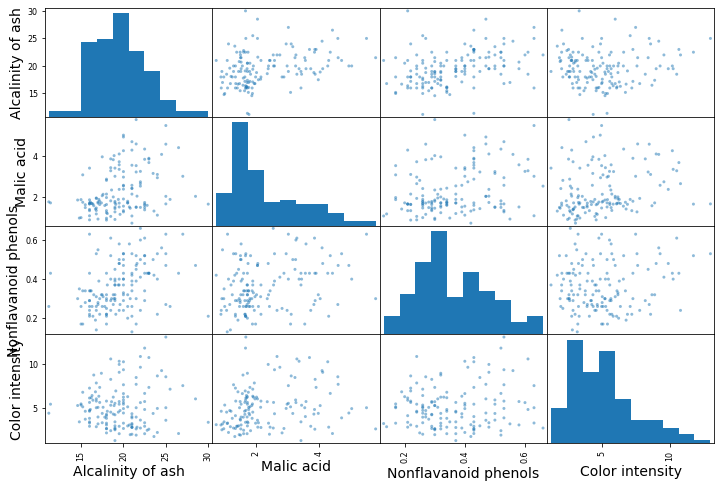

In [40]:
from pandas.plotting import scatter_matrix
attributes = ["Alcalinity of ash","Malic acid","Nonflavanoid phenols", "Color intensity"]
scatter_matrix(wineData[attributes],figsize=(12,8))

saving figure Magnesium_vs_Proanthocyanins_scatterplot


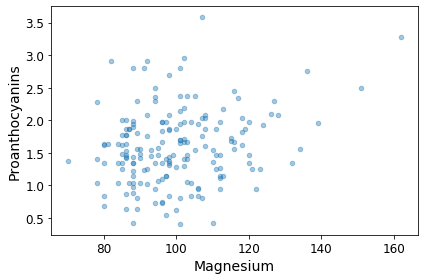

In [43]:
wine.plot(kind="scatter", x="Magnesium",y="Proanthocyanins",
              alpha=0.4)
save_fig("Magnesium_vs_Proanthocyanins_scatterplot")

In [50]:
wineData.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.936620,12.978873,2.313239,2.365000,19.557746,100.070423,2.306408,2.037254,0.362254,1.581831,5.075634,0.954225,2.610563,751.401408
std,0.773816,0.797873,1.110662,0.273791,3.097387,14.544453,0.610654,0.989690,0.121342,0.569668,2.356067,0.227351,0.689689,327.093000
min,1.000000,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.332500,1.530000,2.202500,17.250000,89.000000,1.792500,1.250000,0.262500,1.250000,3.220000,0.792500,2.002500,495.000000
50%,2.000000,13.050000,1.850000,2.355000,19.500000,98.000000,2.410000,2.135000,0.340000,1.535000,4.750000,0.960000,2.780000,673.500000
75%,3.000000,13.627500,3.082500,2.557500,21.500000,108.000000,2.800000,2.787500,0.430000,1.950000,6.182500,1.120000,3.170000,1007.500000
max,3.000000,14.750000,5.800000,3.230000,30.000000,162.000000,3.850000,5.080000,0.660000,3.580000,13.000000,1.710000,3.690000,1680.000000


In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

wine_num = wine.select_dtypes(include=[np.number])
imputer.fit(wine_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [80]:
imputer.statistics_

array([2.000e+00, 1.305e+01, 1.850e+00, 1.950e+01, 9.800e+01, 2.410e+00,
       2.135e+00, 3.400e-01, 1.535e+00, 4.750e+00, 9.600e-01, 2.780e+00,
       6.735e+02])

In [81]:
wine_num.median().values

array([2.000e+00, 1.305e+01, 1.850e+00, 1.950e+01, 9.800e+01, 2.410e+00,
       2.135e+00, 3.400e-01, 1.535e+00, 4.750e+00, 9.600e-01, 2.780e+00,
       6.735e+02])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),                   
])

wine_num_tr = num_pipeline.fit_transform(wine_num)

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(wine_num)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

wine_prepared = full_pipeline.fit_transform(wineData)

#Select and train a model

In [85]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wineData,wineData_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
some_data = wineData.iloc[:5]
some_labels = wineData_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [0.76952163 0.65342185 0.01568573 0.72459189 0.75086917]


In [87]:
print("Labels:", list(some_labels))

Labels: [2.35, 2.68, 2.22, 2.46, 2.72]


In [88]:
some_data_prepared

array([[ 1.37906732,  0.47936929,  0.22296069,  0.14328822, -0.7638383 ,
        -1.48957827, -1.5587668 ,  0.06406585, -1.65915091,  0.2233478 ,
        -1.12216551, -0.20452841,  0.0877421 ],
       [-1.21467519,  0.39132549, -0.31013424, -0.89349786,  0.13313721,
         1.13983811,  1.20943852, -0.43215328,  0.13770431,  0.39372323,
         0.51103604,  0.33384448,  1.59108983],
       [ 0.08219607, -0.86644317,  0.46691938, -0.50470308, -0.83283641,
         0.23597623,  0.21572379, -0.9283724 ,  0.71903983, -1.24614031,
         0.8641607 ,  1.00317294, -1.41560563],
       [ 0.08219607, -0.80355473,  0.12357011,  0.46728386, -0.14285525,
         0.41674861,  0.07376454, -0.18404371, -0.47886365, -0.96928023,
        -0.68075969,  1.11957789, -0.96153326],
       [-1.21467519,  1.66167183, -0.35531178,  0.14328822,  1.3751033 ,
         0.81116106,  1.118179  , -0.2667469 ,  0.68380737,  0.47891095,
         0.51103604,  0.05738272,  1.62177039]])

In [90]:
from sklearn.metrics import mean_squared_error

wine_pred = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(wineData_labels,wine_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7075300543812668

In [92]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(wineData_labels,wine_pred)
lin_mae

1.624317031744084

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=70)
tree_reg.fit(wine_prepared, wineData_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=70, splitter='best')

In [95]:
wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(wineData_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#Fine-tune your model

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_prepared, wineData_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [97]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.27123176 0.38769404 0.24357457 0.34223008 0.33671735 0.18924663
 0.31090881 0.26710084 0.2481503  0.31065599]
Mean: 0.29075103519277035
Standard deviation: 0.05499763900602667


In [98]:
lin_scores = cross_val_score(lin_reg, wine_prepared, wineData_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.2341123  0.23045955 0.22992194 0.18015944 0.21250553 0.19943614
 0.18477372 0.19914464 0.18238339 0.18127602]
Mean: 0.2034172673026978
Standard deviation: 0.02076977757628868


In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=70)
forest_reg.fit(wine_prepared, wineData_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=70, verbose=0, warm_start=False)

In [100]:
wine_predictions = forest_reg.predict(wine_prepared)
forest_mse = mean_squared_error(wineData_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.07817146240931673

In [101]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, wine_prepared, wineData_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.22873587 0.2510271  0.20758578 0.2372919  0.23818568 0.15941794
 0.19118062 0.25192822 0.16781263 0.25285043]
Mean: 0.21860161694316133
Standard deviation: 0.03335582398389943


In [102]:
scores = cross_val_score(lin_reg, wine_prepared, wineData_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.203417
std       0.021893
min       0.180159
25%       0.182981
50%       0.199290
75%       0.225568
max       0.234112
dtype: float64

In [104]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(wine_prepared, wineData_labels)
wine_predictions = svm_reg.predict(wine_prepared)
svm_mse = mean_squared_error(wineData_labels, wine_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.18870927127503617

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(wine_prepared, wineData_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [106]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [107]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [108]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.29977500228973497 {'max_features': 2, 'n_estimators': 3}
0.24784625577656622 {'max_features': 2, 'n_estimators': 10}
0.23651564372431544 {'max_features': 2, 'n_estimators': 30}
0.23645865532048418 {'max_features': 4, 'n_estimators': 3}
0.2228759849777516 {'max_features': 4, 'n_estimators': 10}
0.2207525627919207 {'max_features': 4, 'n_estimators': 30}
0.241558109358896 {'max_features': 6, 'n_estimators': 3}
0.22672410264286377 {'max_features': 6, 'n_estimators': 10}
0.2283834064688173 {'max_features': 6, 'n_estimators': 30}
0.2589485972664702 {'max_features': 8, 'n_estimators': 3}
0.2280438084479133 {'max_features': 8, 'n_estimators': 10}
0.2207543766275517 {'max_features': 8, 'n_estimators': 30}
0.2666157535551634 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.23627621443427013 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.23807244554287502 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.239789233191734 {'bootstrap': False, 'max_features': 

In [109]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006464,0.002200,0.000967,0.000087,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.081400,-0.069870,-0.078848,-0.113917,-0.105290,-0.089865,0.016788,18,-1.334454e-02,-1.462163e-02,-1.623343e-02,-1.270507e-02,-1.614883e-02,-1.461070e-02,1.430651e-03
1,0.014840,0.000491,0.001513,0.000105,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.061519,-0.061099,-0.049918,-0.077804,-0.056799,-0.061428,0.009189,14,-1.083830e-02,-1.052927e-02,-1.127707e-02,-1.016331e-02,-1.015846e-02,-1.059328e-02,4.255918e-04
2,0.040302,0.000700,0.002686,0.000121,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.053851,-0.061309,-0.045101,-0.065371,-0.054067,-0.055940,0.006973,10,-7.177941e-03,-7.677054e-03,-8.638596e-03,-8.436000e-03,-7.318105e-03,-7.849539e-03,5.881777e-04
3,0.005307,0.000240,0.000897,0.000086,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.050785,-0.066705,-0.051251,-0.053899,-0.056924,-0.055913,0.005824,9,-1.727355e-02,-1.622203e-02,-1.332417e-02,-1.170146e-02,-1.531004e-02,-1.476625e-02,2.008684e-03
4,0.013733,0.000257,0.001385,0.000078,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.039291,-0.052029,-0.045446,-0.056169,-0.055433,-0.049674,0.006428,3,-1.171082e-02,-1.016535e-02,-1.010057e-02,-8.707754e-03,-1.007846e-02,-1.015259e-02,9.512102e-04
5,0.042260,0.000437,0.002593,0.000096,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.045662,-0.049167,-0.042321,-0.054098,-0.052411,-0.048732,0.004314,1,-7.866255e-03,-7.422421e-03,-8.074801e-03,-8.391355e-03,-8.704924e-03,-8.091951e-03,4.392908e-04
6,0.005818,0.000288,0.000971,0.000092,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.052120,-0.057613,-0.061111,-0.081283,-0.039625,-0.058350,0.013591,13,-1.404946e-02,-1.113491e-02,-1.110351e-02,-1.400097e-02,-1.680253e-02,-1.341828e-02,2.133685e-03
7,0.015471,0.000230,0.001385,0.000020,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.050451,-0.049727,-0.047454,-0.068232,-0.041154,-0.051404,0.009029,4,-7.949044e-03,-9.343903e-03,-7.803772e-03,-9.748789e-03,-9.923351e-03,-8.953772e-03,9.007015e-04
8,0.044106,0.000785,0.002834,0.000153,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.052401,-0.049137,-0.046041,-0.066703,-0.046514,-0.052159,0.007616,6,-6.069706e-03,-7.155318e-03,-6.965321e-03,-8.272410e-03,-8.082388e-03,-7.309029e-03,8.004838e-04
9,0.005820,0.000181,0.000922,0.000065,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.078547,-0.075940,-0.061323,-0.067954,-0.051508,-0.067054,0.009863,16,-2.167099e-02,-1.283795e-02,-9.292203e-03,-1.399347e-02,-1.669366e-02,-1.489766e-02,4.137264e-03


In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(wine_prepared, wineData_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [112]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.21826824168707504 {'max_features': 7, 'n_estimators': 180}
0.22628332913965263 {'max_features': 5, 'n_estimators': 15}
0.22390384385054868 {'max_features': 3, 'n_estimators': 72}
0.22777075572423058 {'max_features': 5, 'n_estimators': 21}
0.2195501655827589 {'max_features': 7, 'n_estimators': 122}
0.22321350513255955 {'max_features': 3, 'n_estimators': 75}
0.2245644634856441 {'max_features': 3, 'n_estimators': 88}
0.22240565524005593 {'max_features': 5, 'n_estimators': 100}
0.225703491066452 {'max_features': 3, 'n_estimators': 150}
0.26980096659640546 {'max_features': 5, 'n_estimators': 2}


In [113]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03407417, 0.08832715, 0.06484267, 0.18744469, 0.13467314,
       0.05200521, 0.08299081, 0.06036418, 0.05049624, 0.06178638,
       0.05238627, 0.07192716, 0.05868194])

In [116]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Class", axis=1)
y_test = strat_test_set["Class"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [117]:
final_mse

0.7993016666666666

In [118]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.71666052, 1.04163383])

In [119]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.716660518389601, 1.0416338294789016)

In [120]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.7235148475124598, 1.0368845638557627)

#All abvoe cells were repeated following the experiments in 02_end_to_end_machine_learning_project.ipynb but use the **Wine** dataset instead the **Housing** dataset.